In [69]:
#| code-fold: true
#| code-summary: Load MegaAttitude data

import os
from pandas import DataFrame, read_csv

def load_data(fname: str, verbose: bool = True) -> DataFrame:
    # read the raw data skipping comment rows at the beginning
    data = read_csv(fname, sep="\t")
    
    if verbose:
        n_datapoints = data.shape[0]
        print(f"The full dataset has {n_datapoints} datapoints.")
    
    # remove non-native speakers
    data = data.query("nativeenglish")
    
    if verbose:
        n_datapoints_native = data.shape[0]
        print(f"Removing {n_datapoints - n_datapoints_native} "
              "responses from nonnative speakers.")
    
    # remove NaN judgments
    data = data.query("~response.isnull()")
    
    if verbose:
        n_datapoints_nonnull = data.shape[0]
        print(f"Removing {n_datapoints_native - n_datapoints_nonnull} NA responses.")
    
    return data

data = load_data("data/mega-acceptability-v1/mega-acceptability-v1.tsv", verbose=False)

In [37]:
#| code-fold: true
#| code-summary: Frame-to-constitutent mapping

from collections import OrderedDict

frame_to_constituents = OrderedDict({
    'NP was Ved whichNP to VP': {
        ("NP_subj", "NP_obj", "whichNP to VP"),
        ("NP_obj", "whichNP to VP")
    }, 
    'NP Ved for NP to VP': {
        ("NP_subj", "for NP to VP"), 
        ("NP_subj", "PP_for", "to VP")
    },
    'NP Ved NP to VP[+eventive]': {
        ("NP_subj", "NP to VP[+eventive]"), 
        ("NP_subj", "NP_obj", "to VP[+eventive]")
    }, 
    'NP was Ved whether to VP': {
        ("NP_subj", "NP_obj", "whether to VP"),
        ("NP_obj", "whether to VP")
    },
    'NP Ved to VP[+eventive]': {
        ("NP_subj", "to VP[+eventive]")
    }, 
    'NP Ved NP to NP': {
        ("NP_subj", "NP_obj", "NP_iobj") 
    }, 
    'NP Ved NP that S': {
        ("NP_subj", "NP_obj", "that S") 
    },
    'NP was Ved about NP': {
        ("NP_subj", "NP_obj", "about NP") ,
        ("NP_obj", "about NP") 
    }, 
    'NP was Ved that S[-tense]': {
        ("NP_subj", "NP_obj", "S[-tense]") ,
        ("NP_obj", "S[-tense]") 
    },
    'NP Ved to NP that S[+future]': {
        ("NP_subj", "NP_iobj", "that S[+future]") 
    }, 
    'NP Ved whether to VP': {
        ("NP_subj", "whether to VP")
    },
    'NP Ved whichNP to VP': {
        ("NP_subj", "whichNP to VP")
    }, 
    'NP Ved about whether S': {
        ("NP_subj", "about whether S") 
    },
    'NP Ved whichNP S': {
        ("NP_subj", "whichNP S")
    }, 
    'NP Ved that S[-tense]': {
        ("NP_subj", "that S[-tense]") 
    },
    'NP Ved whether S[+future]': {
        ("NP_subj", "whether S[+future]") 
    }, 
    'NP was Ved that S[+future]': {
        ("NP_subj", "NP_obj", "that S[+future]") ,
        ("NP_obj", "that S[+future]") 
    },
    'NP Ved to NP whether S': {
        ("NP_subj", "NP_iobj", "whether S") 
    }, 
    'NP Ved': {
        ("NP_subj",)
    }, 
    'NP Ved NP to VP[-eventive]': {
        ("NP_subj", "NP to VP[-eventive]"), 
        ("NP_subj", "NP_obj", "to VP[-eventive]"),
        ("NP_subj", "NP to VP[-eventive]")
    },
    'NP was Ved so': {
        ("NP_obj", "so"), 
        ("NP_subj", "NP_obj", "so")
    }, 
    'NP Ved so': {
        ("NP_subj", "so")
    }, 
    'NP Ved NP that S[+future]': {
        ("NP_subj", "NP_obj", "that S[+future]")
    },
    'NP Ved NP whether S[+future]': {
        ("NP_subj", "NP_obj", "whether S[+future]")
    }, 
    'NP Ved to NP whether S[+future]': {
        ("NP_subj", "NP_iobj", "whether S[+future]")
    },
    'NP was Ved that S': {
        ("NP_obj", "that S"), 
        ("NP_subj", "NP_obj", "that S")
    }, 
    'NP Ved NP whether S': {
        ("NP_subj", "NP_obj", "whether S")
    }, 
    'NP was Ved whether S': {
        ("NP_obj", "whether S"), 
        ("NP_subj", "NP_obj", "whether S")
    },
    'NP was Ved to VP[-eventive]': {
        ("NP_obj", "to VP[-eventive]"), 
        ("NP_subj", "NP_obj", "to VP[-eventive]"),
        ("NP_subj", "NP to VP[-eventive]")
    }, 
    'NP Ved NP VP': {
        ("NP_subj", "NP_obj", "VP"),
        ("NP_subj", "NP VP")
    }, 
    'NP Ved VPing': {
        ("NP_subj", "VPing")
    },
    'NP was Ved to VP[+eventive]': {
        ("NP_obj", "to VP[+eventive]"), 
        ("NP_subj", "NP_obj", "to VP[+eventive]"),
        ("NP_subj", "NP to VP[+eventive]")
    }, 
    'NP Ved NP that S[-tense]': {
        ("NP_subj", "NP_obj", "that S[-tense]")
    },
    'NP Ved that S': {
        ("NP_subj", "that S")
    }, 
    'NP was Ved': {
        ("NP_obj",), 
        ("NP_subj", "NP_obj")
    }, 
    'NP Ved S': {
        ("NP_subj", "S")
    },
    'NP Ved that S[+future]': {
        ("NP_subj", "that S[+future]")
    }, 
    'NP was Ved about whether S': {
        ("NP_subj", "NP_obj", "about whether S") ,
        ("NP_obj", "about whether S") 
    },
    'NP Ved NP': {
        ("NP_subj", "NP_obj") 
    }, 
    'NP Ved NP VPing': {
        ("NP_subj", "NP_obj", "VPing"),
        ("NP_subj", "NP VPing")
    }, 
    'NP Ved NP whichNP S': {
        ("NP_subj", "NP_obj", "whichNP S")
    },
    'NP Ved about NP': {
        ("NP_subj", "about NP") 
    }, 
    'NP was Ved S': {
        ("NP_subj", "NP_obj", "S") ,
        ("NP_obj", "S") 
    }, 
    'NP Ved to NP that S': {
        ("NP_subj", "NP_iobj", "that S"),
    },
    'NP was Ved whether S[+future]': {
        ("NP_subj", "NP_obj", "whether S[+future]") ,
        ("NP_obj", "whether S[+future]") 
    }, 
    'NP Ved whether S': {
        ("NP_subj", "whether S") 
    },
    'NP was Ved whichNP S': {
        ("NP_subj", "NP_obj", "whichNP S") ,
        ("NP_obj", "whichNP S") 
    }, 
    'NP Ved to NP that S[-tense]': {
        ("NP_subj", "NP_iobj", "that S[-tense]")
    },
    'NP Ved to VP[-eventive]': {
        ("NP_subj", "to VP[-eventive]")
    }
})

data = data[data.frame.isin(frame_to_constituents)]

In [38]:
#| code-fold: true
#| code-summary: Constituent-to-feature vector mapping

from numpy import array, zeros, where, isin
from xarray import DataArray

constituents = array(sorted({
    c 
    for tups in frame_to_constituents.values() 
    for t in tups 
    for c in t
}))

max_parses = max(
    len(t) 
    for tups in frame_to_constituents.values() 
    for t in tups 
)
    
constituents_to_feature = zeros([
    len(frame_to_constituents), max_parses, len(constituents)
])
    
for i, (f, parses) in enumerate(frame_to_constituents.items()):
    for j, parse in enumerate(parses):
        for k, const in enumerate(parse):
            const_idx = where(constituents == const)[0][0]
            constituents_to_feature[i,j,const_idx] = 1.
            
constituents_to_feature = DataArray(
    constituents_to_feature, 
    dims=["frame", "parse", "constituent"],
    coords={
        "frame": list(frame_to_constituents),
        "parse": list(range(max_parses)),
        "constituent": constituents,
    }
)

constituents_to_feature.loc[]

<xarray.DataArray (frame: 49, parse: 3, constituent: 27)>
array([[[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * frame        (frame) <U31 'NP was Ved whichNP to VP' ... 'NP Ved to VP[-e...
  * parse        (parse) int64 0 1 2
  * constituent  (constituent) <U19 'NP VP' 'NP VPing' ... 'whichNP to VP'

In [74]:
from dataclasses import dataclass
from numpy import ndarray

@dataclass
class BaseSelectionModelParameters:
    n_verb: int
    n_frame: int
    n_subj: int
    n_resp_levels: int
    
@dataclass
class StructuredSelectionModelParameters(BaseSelectionModelParameters):
    constituents_to_feature: DataArray
    n_constituent_types: int
    n_primitive_semantic_types: int
    n_primitive_syntactic_types: int
    max_complex_type_size: int

@dataclass
class SelectionData:
    verb: ndarray
    frame: ndarray
    subj: ndarray
    resp: ndarray

In [75]:
import torch
from typing import Optional
from numpy import prod
from torch import Tensor, zeros, zeros_like, ones_like

ZERO = 1e-3
ONE = 1. - ZERO

class StructuredSelectionModel(torch.nn.Module):
    parameter_class = StructuredSelectionModelParameters
    data_class = SelectionData
    
    def __init__(self, parameters: StructuredSelectionModelParameters):
        super().__init__()
        
        self.model_parameters = parameters
        
        verb_shape = (parameters.n_verb,) + self.complex_semantic_type_shape
        self.verb_complex_semantic_type_aux = torch.nn.Parameter(
            torch.randn(verb_shape), 
            requires_grad=True
        )
        
        frame_shape = (parameters.n_frame,) + self.complex_syntactic_type_shape
        self.frame_complex_syntactic_type_aux = torch.nn.Parameter(
            torch.randn(frame_shape), 
            requires_grad=True
        )
        
        primitive_type_map_aux = zeros([
            parameters.n_primitive_semantic_types + 1, 
            parameters.n_primitive_syntactic_types + 1
        ])

        self.primitive_type_map_aux = torch.nn.Parameter(
            primitive_type_map_aux, 
            requires_grad=True
        )
        
        syntactic_primitive_type_constituent_map_aux = zeros([
             parameters.n_primitive_syntactic_types + 1,
             parameters.n_constituent_types
        ])
        
        self.syntactic_primitive_type_constituent_map_aux = torch.nn.Parameter(
            syntactic_primitive_type_constituent_map_aux, 
            requires_grad=True
        )
        
        self.log_jumps = torch.nn.Parameter(
            torch.ones([
                parameters.n_subj, parameters.n_resp_levels-1
            ]), 
            requires_grad=True
        )

    @property
    def complex_semantic_type_shape(self):
        return (self.model_parameters.n_primitive_semantic_types+1,) *\
               self.model_parameters.max_complex_type_size
    
    @property
    def complex_syntactic_type_shape(self):
        return (self.model_parameters.n_primitive_syntactic_types+1,)*\
               self.model_parameters.max_complex_type_size
        
    def forward(self, data: SelectionData):
        verb_frame_prob = self.verb_frame_prob(data.verb, data.frame)
        verb_frame_logodds = torch.log(verb_frame_prob) - torch.log(1. - verb_frame_prob)
        
        jumps = self.jumps[data.subj]
        
        return ordered_logistic_likelihood(
            verb_frame_logodds, jumps
        )
    
    def verb_frame_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None,
        #feature: ndarray
    ) -> Tensor:
        n_verb = self.model_parameters.n_verb
        n_frame = self.model_parameters.n_frame
        
        verb_shape = self.complex_semantic_type_shape +\
                     (1,) * len(self.complex_syntactic_type_shape)
        frame_shape = (1,) * len(self.complex_semantic_type_shape) +\
                      self.complex_syntactic_type_shape
        
        if verb_idx is not None or frame_idx is not None:
            if verb_idx.shape != frame_idx.shape:
                raise ValueError
            else:
                resp_shape = verb_idx.shape[0]
            
            # shape for verbs and frames to complex type signatures
            verb_shape = (resp_shape,) + verb_shape
            frame_shape = (resp_shape,) + frame_shape
            
            # shape with response dimension inserted into map
            map_shape = (1,) + self.complex_type_map.shape
            
            # shape for computing prod on all but the reponse dimension
            flat_shape = (resp_shape, prod(map_shape))
            
            p = self.verb_complex_semantic_type[verb_idx].view(verb_shape) *\
                self.frame_complex_syntactic_type[frame_idx].view(frame_shape) *\
                self.complex_type_map.view(map_shape)
            
            print(p.shape)
            
            acc = 1. - (1. - p.view(flat_shape)).prod(axis=1)
            acc = acc.clamp(min=ZERO, max=ONE)
            
            return acc
        
        elif verb_idx is None and frame_idx is not None:
            raise NotImplementedError
        elif verb_idx is not None and frame_idx is None:
            raise NotImplementedError
        else:
            raise NotImplementedError
#             verb_shape = (n_verb, 1) + verb_shape
#             frame_shape = (1, n_frame) + frame_shape
#             map_shape = (1, 1) + self.complex_type_map.shape
            
#             # shape for computing prod on all but the verb and frame dimensions
#             flat_shape = (n_verb, n_frame, prod(map_shape))
            
#             p = self.verb_complex_semantic_type.view(verb_shape) *\
#                 self.frame_complex_syntactic_type.view(frame_shape) *\
#                 self.complex_type_map.view(map_shape)
            
#             return 1. - (1. - p.view(flat_shape)).prod(axis=2)   
    
    @property
    def verb_complex_semantic_type(self) -> Tensor:
        return torch.sigmoid(self.verb_complex_semantic_type_aux)
    
    @property
    def frame_complex_syntactic_type(self) -> Tensor:
        return torch.sigmoid(self.frame_complex_syntactic_type_aux)
    
    @property
    def primitive_type_map(self) -> Tensor:
        prob = torch.sigmoid(self.primitive_type_map_aux)
        
        # the 0th primitive type is the null primitive type and null 
        # primitive types should only map onto each other, we do this
        # by multiplying by a special mask
        mask = ones_like(prob)
        mask[0,0] = 1/prob[0,0]
        mask[0,1:] = 0.0
        mask[1:,0] = 0.0
        
        return mask * prob
    
    @property
    def complex_type_map(self):
        final_shape = self.primitive_type_map.shape *\
                      self.model_parameters.max_complex_type_size
        
        shape = (self.primitive_type_map.shape[0],) +\
                (1,) * (self.model_parameters.max_complex_type_size - 1) +\
                (self.primitive_type_map.shape[1],) +\
                (1,) * (self.model_parameters.max_complex_type_size - 1)
        m = self.primitive_type_map.view(shape)
        
        for i in range(1, self.model_parameters.max_complex_type_size):
            shape = (1,) * i +\
                    (self.primitive_type_map.shape[0],) +\
                    (1,) * (self.model_parameters.max_complex_type_size - (i + 1)) +\
                    (1,) * i +\
                    (self.primitive_type_map.shape[1],) +\
                    (1,) * (self.model_parameters.max_complex_type_size - (i + 1))
            m = m * self.primitive_type_map.view(shape)
            
        return m
    
    @property
    def syntactic_primitive_type_constituent_map(self):
        prob = torch.sigmoid(
            self.syntactic_primitive_type_constituent_map_aux
        )

        # the 0th primitive type is the null primitive type and null 
        # primitive types should not map onto any constitutent, we do 
        # this by multiplying by a special mask
        mask = ones_like(prob)
        mask[0,:] = 0.0
        
        return mask * prob
    
    @property
    def jumps(self):
        return torch.exp(self.log_jumps)

In [76]:
import torch
from torch import Tensor

def ordered_logistic_likelihood(value: Tensor, jumps: Tensor, center: bool = True) -> Tensor:
    """Compute the ordered logistic likelihood given a value
    
    Parameters
    ----------
    value
        The value to compute the likelihood for 
        (shape: batch_size)
    jumps
        The distance between cutpoints 
        (shape: batch_size x number of response levels - 1)

    Returns
    -------
    log_likelihood
        the ordered logistic log-likelihood
    """
    cutpoints = torch.cumsum(jumps, axis=1) 
    
    if center:
        cutpoints = cutpoints - cutpoints.mean(1)[:,None]
    
    cdfs = torch.sigmoid(cutpoints - value[:,None])

    low_prob = torch.cat(
        [torch.zeros([cdfs.shape[0], 1]), cdfs],
        axis=1
    )
    high_prob = torch.cat(
        [cdfs, torch.ones([cdfs.shape[0], 1])],
        axis=1
    )
    
    return high_prob - low_prob

In [77]:
from typing import Optional
from numpy import ndarray
from pandas import CategoricalDtype, Series

def hash_series(series: Series, categories: Optional[list[str]] = None, indexation: int=1) -> tuple[ndarray, ndarray]:
    """Hash a series to numeric codes
    
    Parameters
    ----------
    column
        The series to hash
    index
        The starting index (defaults to 1)
    """
    # enforce 0- or 1-indexation
    if indexation not in [0, 1]:
        raise ValueError("Must choose either 0- or 1-indexation.")
    
    # convert the series to a category
    if categories is None:
        category_series = series.astype("category")
    else:
        cat_type = CategoricalDtype(categories=categories)
        category_series = series.astype(cat_type)
    
    # get the hash
    hash_map = category_series.cat.categories.values
    
    # map to one-indexed codes
    hashed_series = (category_series.cat.codes + indexation).values
    
    return hash_map, hashed_series

In [79]:
from abc import ABC, abstractmethod
from numpy import round, mean, inf
from numpy import random
from numpy.random import choice
from torch import manual_seed

class StructuredSelectionModelTrainerABC(ABC):
    data_class = SelectionData
    
    @abstractmethod
    def construct_model_parameters(self, data: DataFrame) -> BaseSelectionModelParameters:
        raise NotImplementedError
        
    def construct_model_data(self, data: DataFrame) -> SelectionData:            
        frame_hashed, verb_hashed, subj_hashed = self._construct_hashes(data)
        
        model_data = {
            "verb": verb_hashed,
            "frame": frame_hashed,
            "subj": subj_hashed,
            "resp": data.response.astype(int).values - 1
        }
        
        return self.data_class(**model_data)
    
    def _construct_hashes(self, data: DataFrame, ):
        if hasattr(self, "frame_hash_map"):
            _, frame_hashed = hash_series(data.frame, self.frame_hash_map, indexation=0)
        else:
            self.frame_hash_map, frame_hashed = hash_series(data.frame, indexation=0)
            
        if hasattr(self, "verb_hash_map"):
            _, verb_hashed = hash_series(data.verb, self.verb_hash_map, indexation=0)
        else:
            self.verb_hash_map, verb_hashed = hash_series(data.verb, indexation=0)

        if hasattr(self, "subj_hash_map"):
            _, subj_hashed = hash_series(data.participant, self.subj_hash_map, indexation=0)
        else:
            self.subj_hash_map, subj_hashed = hash_series(data.participant, indexation=0)
            
        return frame_hashed, verb_hashed, subj_hashed
    
    def _initialize_model(self, data: DataFrame):
        model_parameters = self.construct_model_parameters(data)
        
        return self.model_class(model_parameters)
    
    def _construct_splits(self, data: DataFrame) -> tuple[SelectionData]:
        verbs = data.verb.unique()
        frames = data.frame.unique()
        
        verb_frame_pairs = [v + "_" + f for v in verbs for f in frames]
        
        n_dev = int(len(verb_frame_pairs) / 10)
        
        verb_frame_pairs_dev = choice(verb_frame_pairs, n_dev, replace=False)
        
        dev_indicator = (data.verb + "_" + data.frame).isin(verb_frame_pairs_dev)
        
        data_train = data[~dev_indicator]
        data_dev = data[dev_indicator]
        
        return data_train, data_dev
    
    def fit(
        self, data: DataFrame, batch_size=1000, max_epochs:int=10_000, 
        lr: float = 1e-5, patience: int = 0, tolerance: float = 0.05, 
        window_size: int = 100, verbosity: int=100, seed: int = 403928
    ) -> StructuredSelectionModel:
        manual_seed(seed)
        random.seed(seed)
        
        # necessary for initializing hashes
        self._construct_hashes(data)
        data_train, data_dev = self._construct_splits(data)
        self.model = self._initialize_model(data_train)
        
        # wrap the dev split responses in a tensor
        # this tensor will be used to compute the correlation between
        # the models expected value for a response and the actual
        # response
        target_dev = torch.tensor(data_dev.response.values)
        
        # initialize the optimizer
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        
        # initialize the dev-train correlation differences
        self.corr_diffs = []
        
        for e in range(max_epochs):
            # shuffle the training data
            data_shuffled = data_train.sample(frac=1.)
            data_shuffled = data_shuffled.reset_index(drop=True)
            
            # compute the number of batches based on the batch size
            n_batches = int(data_shuffled.shape[0]/batch_size)
        
            # zero the total loss for the epoch
            epoch_total_loss = 0.
        
            # initialize the list of correlations
            correlations_train = []
            
            for i in range(n_batches):
                # construct the minibatch
                lower_bound = i*batch_size
                
                if i == (n_batches - 1):
                    upper_bound = data_shuffled.shape[0]
                else:
                    upper_bound = (i+1)*batch_size

                data_sub = self.construct_model_data(
                    data_shuffled.iloc[lower_bound:upper_bound]
                )
                
                # wrap the responses in a tensor
                target = torch.tensor(data_sub.resp)

                # zero out the gradients
                optimizer.zero_grad()

                # compute the (log-)probabilities for the minibatch
                probs = self.model(data_sub)
                logprobs = torch.log(probs)

                # compute the loss
                loss = self.loss_function(logprobs, target)
                loss += self._prior_loss()

                # compute correlation between expected value and target
                expected_value_train = torch.sum(
                    torch.arange(1, probs.shape[1]+1)[None,:] * probs, 
                    axis=1
                )
                corr_train = torch.corrcoef(
                    torch.cat([
                        expected_value_train[None,:], 
                        target[None,:]
                    ], axis=0)
                )
                correlations_train.append(corr_train[0,1].item())
                
                loss.backward()

                optimizer.step()
                
                epoch_total_loss += loss.item()
            
            expected_value_dev = self.expected_value(data_dev)
            corr_dev = torch.corrcoef(
                torch.cat([
                    expected_value_dev[None,:], 
                    target_dev[None,:]
                ], axis=0)
            )[0,1]
            
            correlations_train_mean = mean(correlations_train)
            
            self.corr_diffs.append(
                correlations_train_mean - corr_dev
            )
            
            if verbosity and not e % verbosity:
                print(f"Epoch:             {e}")
                print(f"Mean loss:         {round(epoch_total_loss / n_batches, 2)}")
                print(f"Mean train corr.:  {round(correlations_train_mean, 2)}")
                print(f"Dev corr.:         {round(corr_dev.data.numpy(), 2)}")
                print()
          
            max_window_size = min(len(self.corr_diffs), window_size)
            mean_diff = torch.mean(torch.tensor(self.corr_diffs[-max_window_size:]))
            
            if e > patience and mean_diff > tolerance:
                
                if verbosity:
                    print(f"Epoch:             {e}")
                    print(f"Mean loss:         {round(epoch_total_loss / n_batches, 2)}")
                    print(f"Mean train corr.:  {round(correlations_train_mean, 2)}")
                    print(f"Dev corr.:         {round(corr_dev.data.numpy(), 2)}")
                    print()
                
                break
            else:
                prev_corr_dev = corr_dev
        
        return self
    
    @abstractmethod
    def _prior_loss(self):
        raise NotImplementedError
    
    def expected_value(self, data: DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        expected_value = torch.sum(
            torch.arange(1, 8)[None,:] * probs, 
            axis=1
        )
        
        return expected_value
    
    def likelihood(self, data: DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        return probs[model_data.resp]
    
    def predict(self, data: DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        return probs[model_data.resp]

In [81]:
class StructuredSelectionModelTrainer(StructuredSelectionModelTrainerABC):
    parameter_class = StructuredSelectionModelParameters
    model_class = StructuredSelectionModel
    
    def __init__(
        self, 
        constituents_to_feature: DataArray,
        n_primitive_semantic_types: int, 
        n_primitive_syntactic_types: int, 
        max_complex_type_size: int
    ):
        self.constituents_to_feature = constituents_to_feature
        self.n_primitive_semantic_types = n_primitive_semantic_types
        self.n_primitive_syntactic_types = n_primitive_syntactic_types
        self.max_complex_type_size = max_complex_type_size
        
        self.loss_function = torch.nn.CrossEntropyLoss()
    
    def construct_model_parameters(self, data: DataFrame) -> StructuredSelectionModelParameters:
        
        
        model_parameters = {
            "n_verb": self.verb_hash_map.shape[0],
            "n_frame": self.frame_hash_map.shape[0],
            "n_subj": self.subj_hash_map.shape[0],
            "n_resp_levels": 7,
            "constituents_to_feature": self.constituents_to_feature,
            "n_constituent_types": self.constituents_to_feature.shape[2],
            "n_primitive_semantic_types": self.n_primitive_semantic_types,
            "n_primitive_syntactic_types": self.n_primitive_syntactic_types,
            "max_complex_type_size": self.max_complex_type_size
        }
        
        return self.parameter_class(**model_parameters)
    
    def _prior_loss(self):
        jumps = self.model.jumps
        loss = (jumps / jumps.mean(0)[None,:]).mean()
        
#         verb_component_prior_mean = torch.cumprod(
#             verb_component_prior_mean_aux,
#             axis=0
#         )
#         frame_component_prior_mean = torch.cumprod(
#             frame_component_prior_mean_aux,
#             axis=0
#         )
        
#         if self.nonparametric:
#             hyperprior = Beta(self.alpha, 1.)
            
#             verb_component_prior_mean_aux = self.model.verb_component_prior_mean
#             frame_component_prior_mean_aux = self.model.frame_component_prior_mean
            
#             loss -= hyperprior.log_prob(verb_component_prior_mean_aux).mean()
#             loss -= hyperprior.log_prob(frame_component_prior_mean_aux).mean()
            
#             verb_prior = Beta(
#                 verb_component_prior_mean*self.model.verb_component_prior_precision,
#                 (1.-verb_component_prior_mean)*self.model.verb_component_prior_precision,
#             )
#             frame_prior = Beta(
#                 frame_component_prior_mean*self.model.frame_component_prior_precision,
#                 (1.-frame_component_prior_mean)*self.model.frame_component_prior_precision,
#             )
            
#         if self.alpha != 1. or self.beta != 1.:
#             verb_prior = Beta(self.alpha, self.beta)
#             frame_prior = Beta(self.alpha, self.beta)
            
#         loss -= verb_prior.log_prob(self.model.verb_component_prob).mean()
#         loss -= frame_prior.log_prob(self.model.frame_component_prob).mean()
        
        return loss

In [82]:
unconstrained_models = {}

for n_sem in range(1, 5):
    for n_syn in range(1, 5):
        print(
            f"\nFitting model with {n_sem} primitive semantic types and "
            f"{n_syn} primitive syntactic types...\n"
        )
        unconstrained_models[n_sem, n_syn] = StructuredSelectionModelTrainer(constituents_to_feature, n_sem, n_syn, 3)
        unconstrained_models[n_sem, n_syn].fit(data)


Fitting model with 1 primitive semantic types and 1 primitive syntactic types...

torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2,

KeyboardInterrupt: 

SignificanceResult(statistic=nan, pvalue=nan)

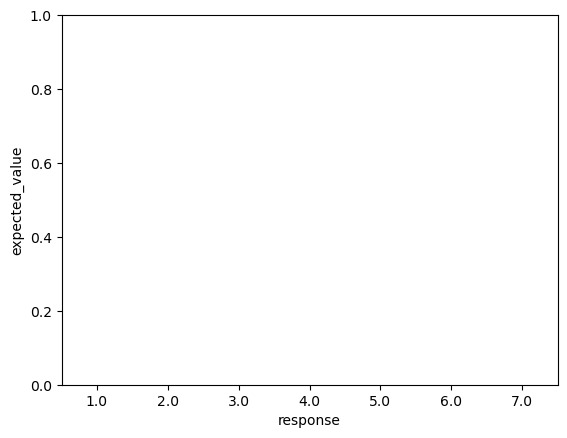

In [299]:
from scipy.stats import spearmanr
from seaborn import boxplot

data["expected_value"] = unconstrained_selection_model.expected_value(data).data

_ = boxplot(data, x="response", y="expected_value")

spearmanr(data[["response", "expected_value"]])

In [132]:
m.model.primitive_type_map

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.4941, 0.4941],
        [0.0000, 0.4941, 0.4941]], grad_fn=<MulBackward0>)

In [ ]:
#sns.clustermap(DataFrame(m.model.frame_component_prob.data, index=m.frame_hash_map), cmap="vlag", yticklabels=True)
sns.clustermap(DataFrame(m.model.verb_component_prob.data, index=m.verb_hash_map), cmap="vlag", yticklabels=True)

In [ ]:
@dataclass
class ConstrainedSelectionModelParameters(SelectionModelParameters):
    n_clause_component: int
    n_nonclause_component: int

In [ ]:
import torch
from torch import Tensor

class ConstrainedSelectionModel(torch.nn.Module):
    parameter_class = ConstrainedSelectionModelParameters
    
    def __init__(self, parameters: ConstrainedSelectionModelParameters):
        super().__init__()
        
        self.model_parameters = parameters
        
        self.verb_clause_aux = torch.nn.Parameter(
            torch.randn([parameters.n_verb]), 
            requires_grad=True
        )
        self.verb_nonclause_aux = torch.nn.Parameter(
            torch.randn([
                parameters.n_verb, parameters.n_nonclause_component
            ]), 
            requires_grad=True
        )
        
        self.frame_clause_aux = torch.nn.Parameter(
            torch.randn([parameters.n_frame]), 
            requires_grad=True
        )
        self.frame_nonclause_aux = torch.nn.Parameter(
            torch.randn([
                parameters.n_frame, parameters.n_nonclause_component
            ]), 
            requires_grad=True
        )
        
        self.log_clause_jumps = torch.nn.Parameter(
            torch.ones(parameters.n_clause_component-1), 
            requires_grad=True
        )
        
        self.log_jumps = torch.nn.Parameter(
            torch.ones([
                parameters.n_subj, parameters.n_resp_levels-1
            ]), 
            requires_grad=True
        )
        

    def forward(self, data: SelectionData):
        verb_frame_prob = self.verb_frame_prob(data.verb, data.frame)
        verb_frame_logodds = torch.log(verb_frame_prob) - torch.log(1. - verb_frame_prob)
        
        jumps = self.jumps[data.subj]
        
        return ordered_logistic_likelihood(
            verb_frame_logodds, jumps
        )
   
    def verb_frame_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None
    ) -> Tensor:
        return self.verb_frame_clause_prob(verb_idx, frame_idx) *\
               self.verb_frame_nonclause_prob(verb_idx, frame_idx)

    def verb_frame_clause_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None
    ) -> Tensor:
        if verb_idx is not None or frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_clause_component_prob[verb_idx,:] * 
                     self.frame_clause_component_prob[frame_idx,:],
                axis=1
            )
        elif verb_idx is None and frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_clause_component_prob[:,None,:] * 
                     self.frame_clause_component_prob[:,frame_idx,:],
                axis=2
            )
        elif verb_idx is not None and frame_idx is None:
            return 1. - torch.prod(
                1. - self.verb_clause_component_prob[verb_idx,None,:] * 
                     self.frame_clause_component_prob[None,:,:],
                axis=2
            )
        else:
            return 1. - torch.prod(
                1. - self.verb_clause_component_prob[:,None,:] * 
                     self.frame_clause_component_prob[None,:,:],
                axis=2
            ) 

    def verb_frame_nonclause_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None
    ) -> Tensor:
        if verb_idx is not None or frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_nonclause_component_prob[verb_idx,:] * 
                     self.frame_nonclause_component_prob[frame_idx,:],
                axis=1
            )
        elif verb_idx is None and frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_nonclause_component_prob[:,None,:] * 
                     self.frame_nonclause_component_prob[:,frame_idx,:],
                axis=2
            )
        elif verb_idx is not None and frame_idx is None:
            return 1. - torch.prod(
                1. - self.verb_nonclause_component_prob[verb_idx,None,:] * 
                     self.frame_nonclause_component_prob[None,:,:],
                axis=2
            )
        else:
            return 1. - torch.prod(
                1. - self.verb_nonclause_component_prob[:,None,:] * 
                     self.frame_nonclause_component_prob[None,:,:],
                axis=2
            )       
    
    @property
    def verb_clause_component_prob(self) -> Tensor:
        return ordered_logistic_likelihood(
            self.verb_clause_aux, self.clause_jumps[None,:]
        )
    
    @property
    def frame_clause_component_prob(self) -> Tensor:
        return ordered_logistic_likelihood(
            self.frame_clause_aux, self.clause_jumps[None,:]
        )
    
    @property
    def verb_nonclause_component_prob(self) -> Tensor:
        return torch.sigmoid(self.verb_nonclause_aux)
    
    @property
    def frame_nonclause_component_prob(self) -> Tensor:
        return torch.sigmoid(self.frame_nonclause_aux)

    @property
    def clause_jumps(self):
        return torch.exp(self.log_clause_jumps)
    
    @property
    def jumps(self):
        return torch.exp(self.log_jumps)

In [ ]:
class ConstrainedSelectionModelTrainer(SelectionModelTrainer):
    parameter_class = ConstrainedSelectionModelParameters
    model_class = ConstrainedSelectionModel
    
    def __init__(self, n_clause_component: int, n_nonclause_component: int):
        self.n_clause_component = n_clause_component
        self.n_nonclause_component = n_nonclause_component
        
        self.loss_function = torch.nn.CrossEntropyLoss(reduction="sum")
    
    def construct_model_parameters(self, data: DataFrame) -> UnconstrainedSelectionModelParameters:
        model_parameters = {
            "n_verb": self.verb_hash_map.shape[0],
            "n_frame": self.frame_hash_map.shape[0],
            "n_subj": self.subj_hash_map.shape[0],
            "n_resp_levels": 7,
            "n_clause_component": self.n_clause_component,
            "n_nonclause_component": self.n_nonclause_component
        }
        
        return self.parameter_class(**model_parameters)
    
m = ConstrainedSelectionModelTrainer(3, 2)
m.fit(data)

In [ ]:
sns.clustermap(DataFrame(m.model.frame_clause_component_prob.data, index=m.frame_hash_map), yticklabels=True)
#sns.clustermap(DataFrame(m.model.verb_component_prob.data, index=m.verb_hash_map), cmap="vlag", yticklabels=True)

In [ ]:
ordered_logistic_likelihood??